In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
manhattan = pd.read_excel('rollingsales_manhattan.xlsx', keep_default_na=False)
bronx = pd.read_excel('rollingsales_bronx.xlsx', keep_default_na=False)
brooklyn = pd.read_excel('rollingsales_brooklyn.xlsx', keep_default_na=False)
queens = pd.read_excel('rollingsales_queens.xlsx', keep_default_na=False)
statenisland = pd.read_excel('rollingsales_statenisland.xlsx', keep_default_na=False)

In [3]:
print(manhattan.head(20))
print(bronx.head(5))
print(brooklyn.head(5))
print(queens.head(5))
print(statenisland.head(5))

    BOROUGH   NEIGHBORHOOD           BUILDING CLASS CATEGORY  \
0         1  ALPHABET CITY           02 TWO FAMILY DWELLINGS   
1         1  ALPHABET CITY    07 RENTALS - WALKUP APARTMENTS   
2         1  ALPHABET CITY    07 RENTALS - WALKUP APARTMENTS   
3         1  ALPHABET CITY    07 RENTALS - WALKUP APARTMENTS   
4         1  ALPHABET CITY    07 RENTALS - WALKUP APARTMENTS   
5         1  ALPHABET CITY    07 RENTALS - WALKUP APARTMENTS   
6         1  ALPHABET CITY    07 RENTALS - WALKUP APARTMENTS   
7         1  ALPHABET CITY    07 RENTALS - WALKUP APARTMENTS   
8         1  ALPHABET CITY    07 RENTALS - WALKUP APARTMENTS   
9         1  ALPHABET CITY    07 RENTALS - WALKUP APARTMENTS   
10        1  ALPHABET CITY    07 RENTALS - WALKUP APARTMENTS   
11        1  ALPHABET CITY    07 RENTALS - WALKUP APARTMENTS   
12        1  ALPHABET CITY  08 RENTALS - ELEVATOR APARTMENTS   
13        1  ALPHABET CITY      09 COOPS - WALKUP APARTMENTS   
14        1  ALPHABET CITY      09 COOPS

In [4]:
print("manhattan")
missing_data_manhattan = manhattan.isnull().sum()
print(missing_data_manhattan)

print("bronx")
missing_data_bronx = bronx.isnull().sum()
print(missing_data_bronx)

print("brooklyn")
missing_data_brooklyn = brooklyn.isnull().sum()
print(missing_data_brooklyn)

print("queens")
missing_data_queens = queens.isnull().sum()
print(missing_data_queens)

print("statenisland")
missing_data_statenisland = statenisland.isnull().sum()
print(missing_data_statenisland)

manhattan
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASEMENT                          0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64
bronx
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0

In [5]:
summary_statistics_manhattan = manhattan.describe()
print("Попередня статистична оцінка даних в manhattan:")
print(summary_statistics_manhattan)

summary_statistics_bronx = bronx.describe()
print("Попередня статистична оцінка даних в bronx:")
print(summary_statistics_bronx)

summary_statistics_brooklyn = brooklyn.describe()
print("Попередня статистична оцінка даних в brooklyn:")
print(summary_statistics_brooklyn)

summary_statistics_queens = queens.describe()
print("Попередня статистична оцінка даних в queens:")
print(summary_statistics_queens)

summary_statistics_statenisland = statenisland.describe()
print("Попередня статистична оцінка даних в statenisland:")
print(summary_statistics_statenisland)

Попередня статистична оцінка даних в manhattan:
       BOROUGH         BLOCK           LOT      ZIP CODE  \
count  16997.0  16997.000000  16997.000000  16997.000000   
mean       1.0   1108.569689    740.825087  10031.054127   
std        0.0    548.806953    863.575737     41.658300   
min        1.0      5.000000      1.000000  10001.000000   
25%        1.0    744.000000     29.000000  10013.000000   
50%        1.0   1171.000000   1004.000000  10022.000000   
75%        1.0   1471.000000   1202.000000  10028.000000   
max        1.0   2250.000000   9079.000000  10463.000000   

       TAX CLASS AT TIME OF SALE    SALE PRICE  
count               16997.000000  1.699700e+04  
mean                    2.093016  3.073518e+06  
std                     0.477176  1.565114e+07  
min                     1.000000  0.000000e+00  
25%                     2.000000  3.060000e+05  
50%                     2.000000  9.030000e+05  
75%                     2.000000  2.192324e+06  
max                

In [6]:
def assign_color(tax_type):
    if tax_type in tax_colors:
        return tax_colors[tax_type]
    
    new_color = color_palette[len(tax_colors) % len(color_palette)]
    tax_colors[tax_type] = new_color
    return new_color

<Figure size 432x288 with 0 Axes>

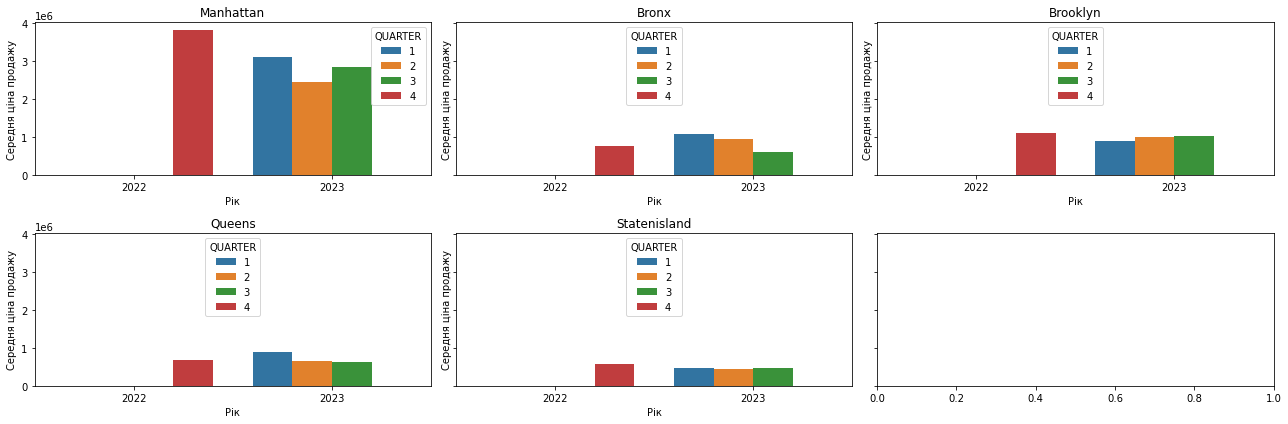

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [33]:
boroughs = [manhattan, bronx, brooklyn, queens, statenisland]
boroughs_names = ['manhattan', 'bronx', 'brooklyn', 'queens', 'statenisland']

num_rows = 2
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 6), sharey=True)

for i, (df, borough) in enumerate(zip(boroughs, boroughs_names)):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    df = df.dropna(subset=["SALE PRICE", "SALE DATE"])
    df["SALE DATE"] = pd.to_datetime(df["SALE DATE"])
    df["YEAR"] = df["SALE DATE"].dt.year
    df["QUARTER"] = df["SALE DATE"].dt.quarter

    average_prices = df.groupby(["YEAR", "QUARTER"])["SALE PRICE"].mean().reset_index()

    sb.barplot(data=average_prices, x="YEAR", y="SALE PRICE", hue="QUARTER", ax=ax, ci=None)
    ax.set_title(borough.capitalize())
    ax.set_xlabel("Рік")
    ax.set_ylabel("Середня ціна продажу")

plt.tight_layout()

for i, borough in enumerate(boroughs_names):
    plt.figure(i)
    plt.savefig(f'Serena_cena_prodazhu_po_kvartalam_{borough}.png', dpi=300)

plt.show()

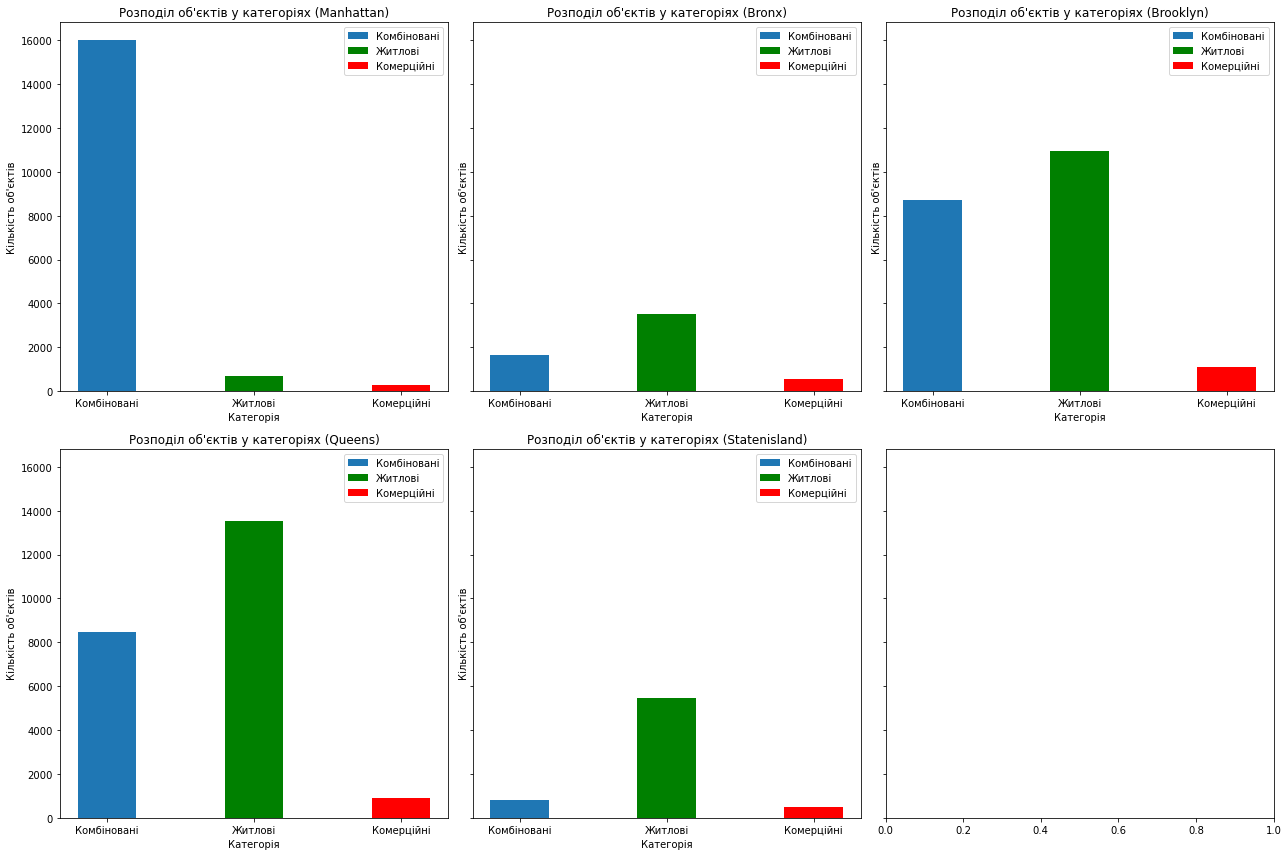

In [34]:
boroughs = [manhattan, bronx, brooklyn, queens, statenisland]
borough_names = ['manhattan', 'bronx', 'brooklyn', 'queens', 'statenisland']

for df in boroughs:
    df["CATEGORY"] = "Комбіновані"
    df.loc[df["COMMERCIAL UNITS"] == 0, "CATEGORY"] = "Житлові"
    df.loc[df["RESIDENTIAL UNITS"] == 0, "CATEGORY"] = "Комерційні"

num_rows = 2
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 6 * num_rows), sharey=True)

for i, df in enumerate(boroughs):
    combined_data = df[df["CATEGORY"] == "Комбіновані"]
    residential_data = df[df["CATEGORY"] == "Житлові"]
    commercial_data = df[df["CATEGORY"] == "Комерційні"]
    df.dropna(subset=["RESIDENTIAL UNITS", "COMMERCIAL UNITS"], inplace=True)

    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    ax.bar(combined_data["CATEGORY"], combined_data["CATEGORY"].count(), width=0.4, label="Комбіновані", align="center")
    ax.bar(residential_data["CATEGORY"], residential_data["CATEGORY"].count(), width=0.4, label="Житлові", align="center", color="green")
    ax.bar(commercial_data["CATEGORY"], commercial_data["CATEGORY"].count(), width=0.4, label="Комерційні", align="center", color="red")
    ax.set_title(f"Розподіл об'єктів у категоріях ({borough_names[i].capitalize()})")
    ax.set_xlabel("Категорія")
    ax.set_ylabel("Кількість об'єктів")
    ax.legend()

plt.tight_layout()
plt.savefig(f'Розподіл_по_категоріям{borough}.png', dpi=300)
plt.show()

Кореляція між LAND SQUARE FEET та SALE PRICE (Manhattan): -0.048075346038721295
Кореляція між LAND SQUARE FEET та SALE PRICE (Bronx): 0.48656859734109076
Кореляція між LAND SQUARE FEET та SALE PRICE (Brooklyn): 0.2252735946283457
Кореляція між LAND SQUARE FEET та SALE PRICE (Queens): 0.2985351720664464
Кореляція між LAND SQUARE FEET та SALE PRICE (Statenisland): 0.27541570617510935


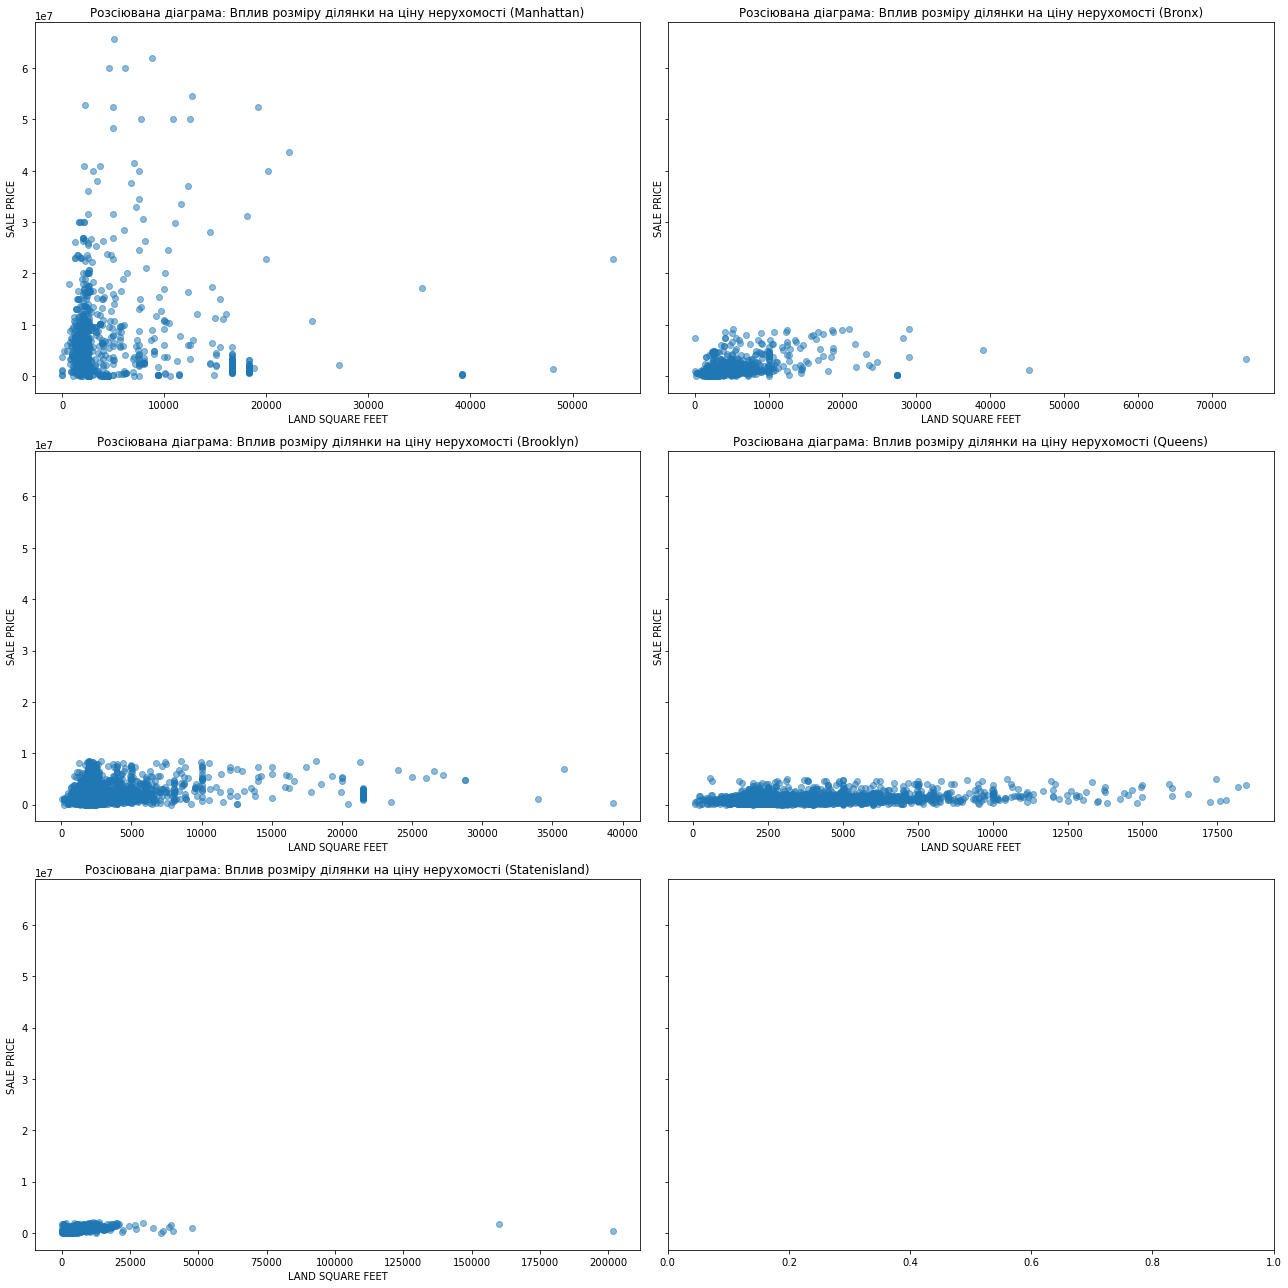

In [35]:
num_rows = 3
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 6 * num_rows), sharey=True)

for i, df in enumerate(boroughs):
    df = df.copy()
    df = df[df['LAND SQUARE FEET'] != '']
    df.loc[:, 'LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
    df = df.dropna(subset=['LAND SQUARE FEET', 'SALE PRICE'])
    
    std_dev_land = np.std(df['LAND SQUARE FEET'])
    std_dev_price = np.std(df['SALE PRICE'])

    # Визначення межі для "відсічки" (наприклад, 3 стандартних відхилень від середнього)
    trim_threshold_land = 2 * std_dev_land
    trim_threshold_price = 2 * std_dev_price
    min_price_threshold = 7000
    
    # Фільтрація даних, залишаючи лише значення в межах "відсічки"
    df = df[(df['LAND SQUARE FEET'] <= trim_threshold_land) & (df['LAND SQUARE FEET'] >= 0)]
    df = df[(df['SALE PRICE'] <= trim_threshold_price) & (df['SALE PRICE'] >= min_price_threshold)]
    
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    ax.scatter(df['LAND SQUARE FEET'], df['SALE PRICE'], alpha=0.5)
    ax.set_title(f'Розсіювана діаграма: Вплив розміру ділянки на ціну нерухомості ({borough_names[i].capitalize()})')
    ax.set_xlabel('LAND SQUARE FEET')
    ax.set_ylabel('SALE PRICE')

    correlation = df['LAND SQUARE FEET'].corr(df['SALE PRICE'])
    print(f'Кореляція між LAND SQUARE FEET та SALE PRICE ({borough_names[i].capitalize()}): {correlation}')

plt.tight_layout()
plt.savefig(f'Вплив_розміру_ділянки_на_ціну_{borough}.png', dpi=300)
plt.show()

Кореляція між YEAR BUILT та SALE PRICE (Manhattan): 0.01725107907579666
Кореляція між YEAR BUILT та SALE PRICE (Bronx): -0.01655278089403703
Кореляція між YEAR BUILT та SALE PRICE (Brooklyn): -0.10748210010628406
Кореляція між YEAR BUILT та SALE PRICE (Queens): 0.03325568513165541
Кореляція між YEAR BUILT та SALE PRICE (Statenisland): 0.18092711279170987


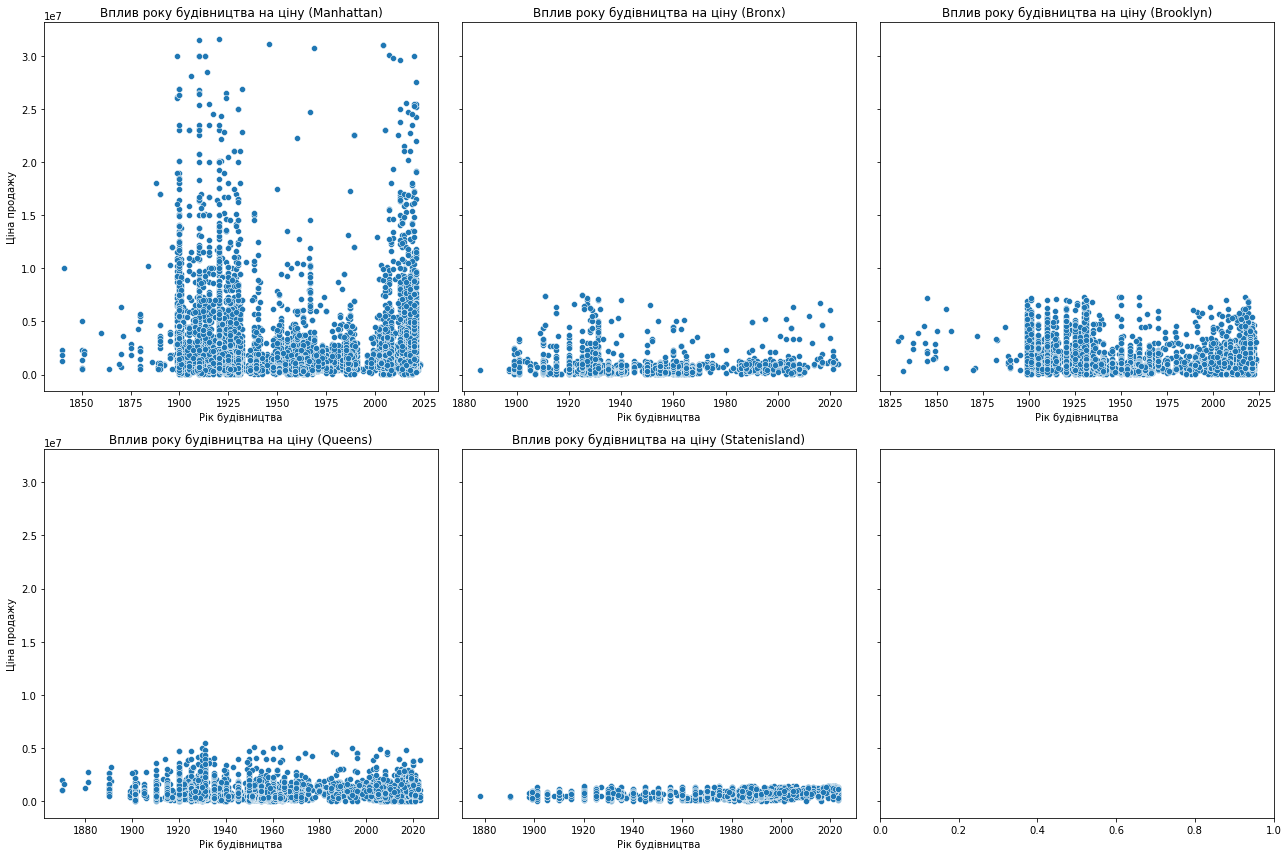

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12), sharey=True)
for i, df in enumerate(boroughs):
    df = df.copy()
    df = df[df['YEAR BUILT'] != '']
    df.loc[:, 'YEAR BUILT'] = pd.to_numeric(df['YEAR BUILT'], errors='coerce')
    df.dropna(subset=["YEAR BUILT", "SALE PRICE"], inplace=True)
    std_dev_price = np.std(df['SALE PRICE'])
    mean_year_built = df['YEAR BUILT'].mean()
    std_dev_year_built = df['YEAR BUILT'].std()

    trim_threshold_price = 2 * std_dev_price
    trim_threshold_year_built = 3 * std_dev_year_built
    min_price_threshold = 7000
    
    df = df[(df['SALE PRICE'] <= trim_threshold_price) & (df['SALE PRICE'] >= min_price_threshold)]
    df = df[(df['YEAR BUILT'] >= mean_year_built - trim_threshold_year_built) & (df['YEAR BUILT'] <= mean_year_built + trim_threshold_year_built)]
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    sb.scatterplot(data=df, x="YEAR BUILT", y="SALE PRICE", ax=ax)
    ax.set_title(f'Вплив року будівництва на ціну ({borough_names[i].capitalize()})')
    ax.set_xlabel('Рік будівництва')
    ax.set_ylabel('Ціна продажу')
    correlation = df['YEAR BUILT'].corr(df['SALE PRICE'])
    print(f'Кореляція між YEAR BUILT та SALE PRICE ({borough_names[i].capitalize()}): {correlation}')
    
plt.tight_layout()
plt.savefig(f'Вплив_року_будівництва_на_ціну_{borough}.png', dpi=300)
plt.show()

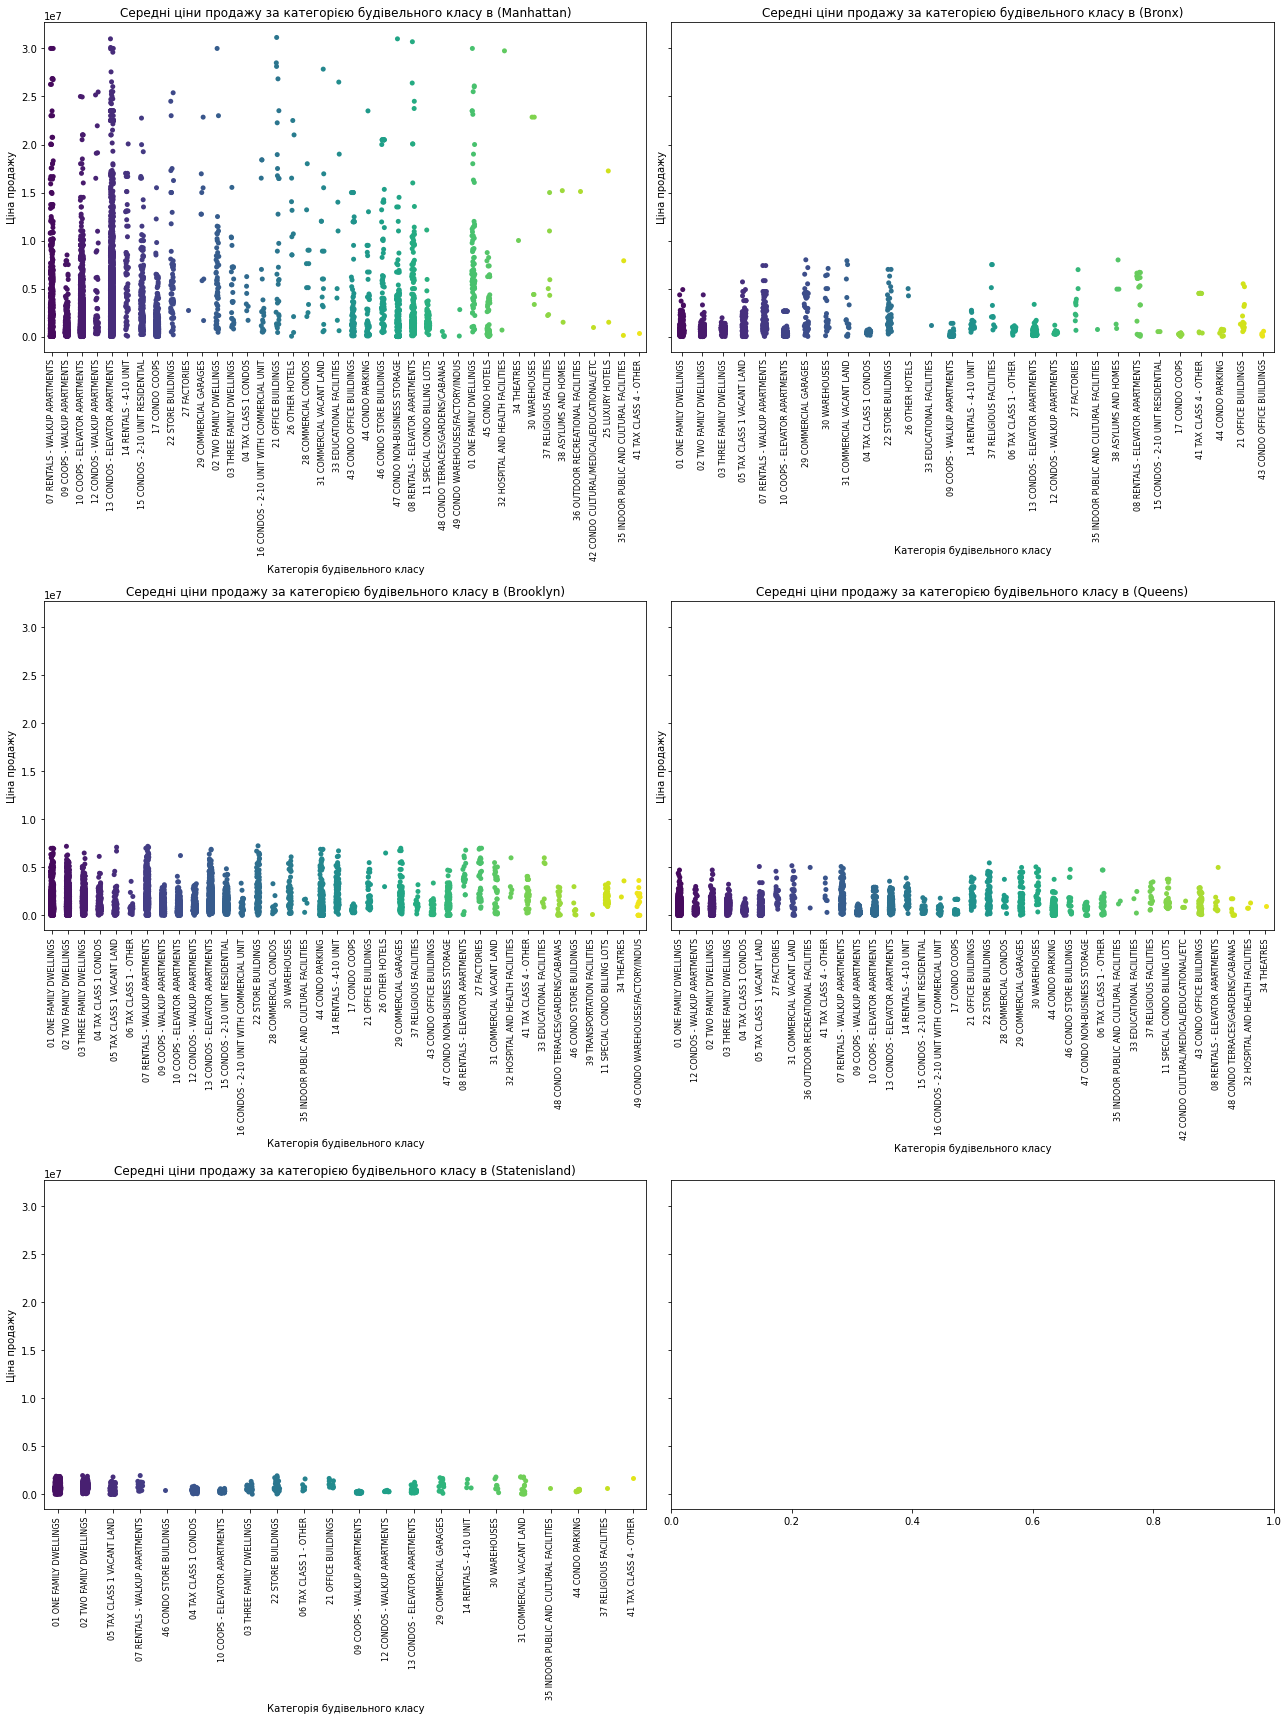

In [37]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 24), sharey=True)
for i, df in enumerate(boroughs):
    df.dropna(subset=["BUILDING CLASS CATEGORY", "SALE PRICE"], inplace=True)
    std_dev_price = np.std(df['SALE PRICE'])

    trim_threshold_price = 2 * std_dev_price
    min_price_threshold = 7000
    df = df[(df['SALE PRICE'] <= trim_threshold_price) & (df['SALE PRICE'] >= min_price_threshold)]
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    sb.stripplot(x="BUILDING CLASS CATEGORY", y="SALE PRICE", data=df, jitter=True, palette="viridis", ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)
    ax.set_title(f'Середні ціни продажу за категорією будівельного класу в ({borough_names[i].capitalize()})')
    ax.set_xlabel('Категорія будівельного класу')
    ax.set_ylabel('Ціна продажу')
    
plt.tight_layout()
plt.savefig(f'Середні_ціни_продажу_за_категорією_будівельного_класу_{borough}.png', dpi=300)
plt.show()

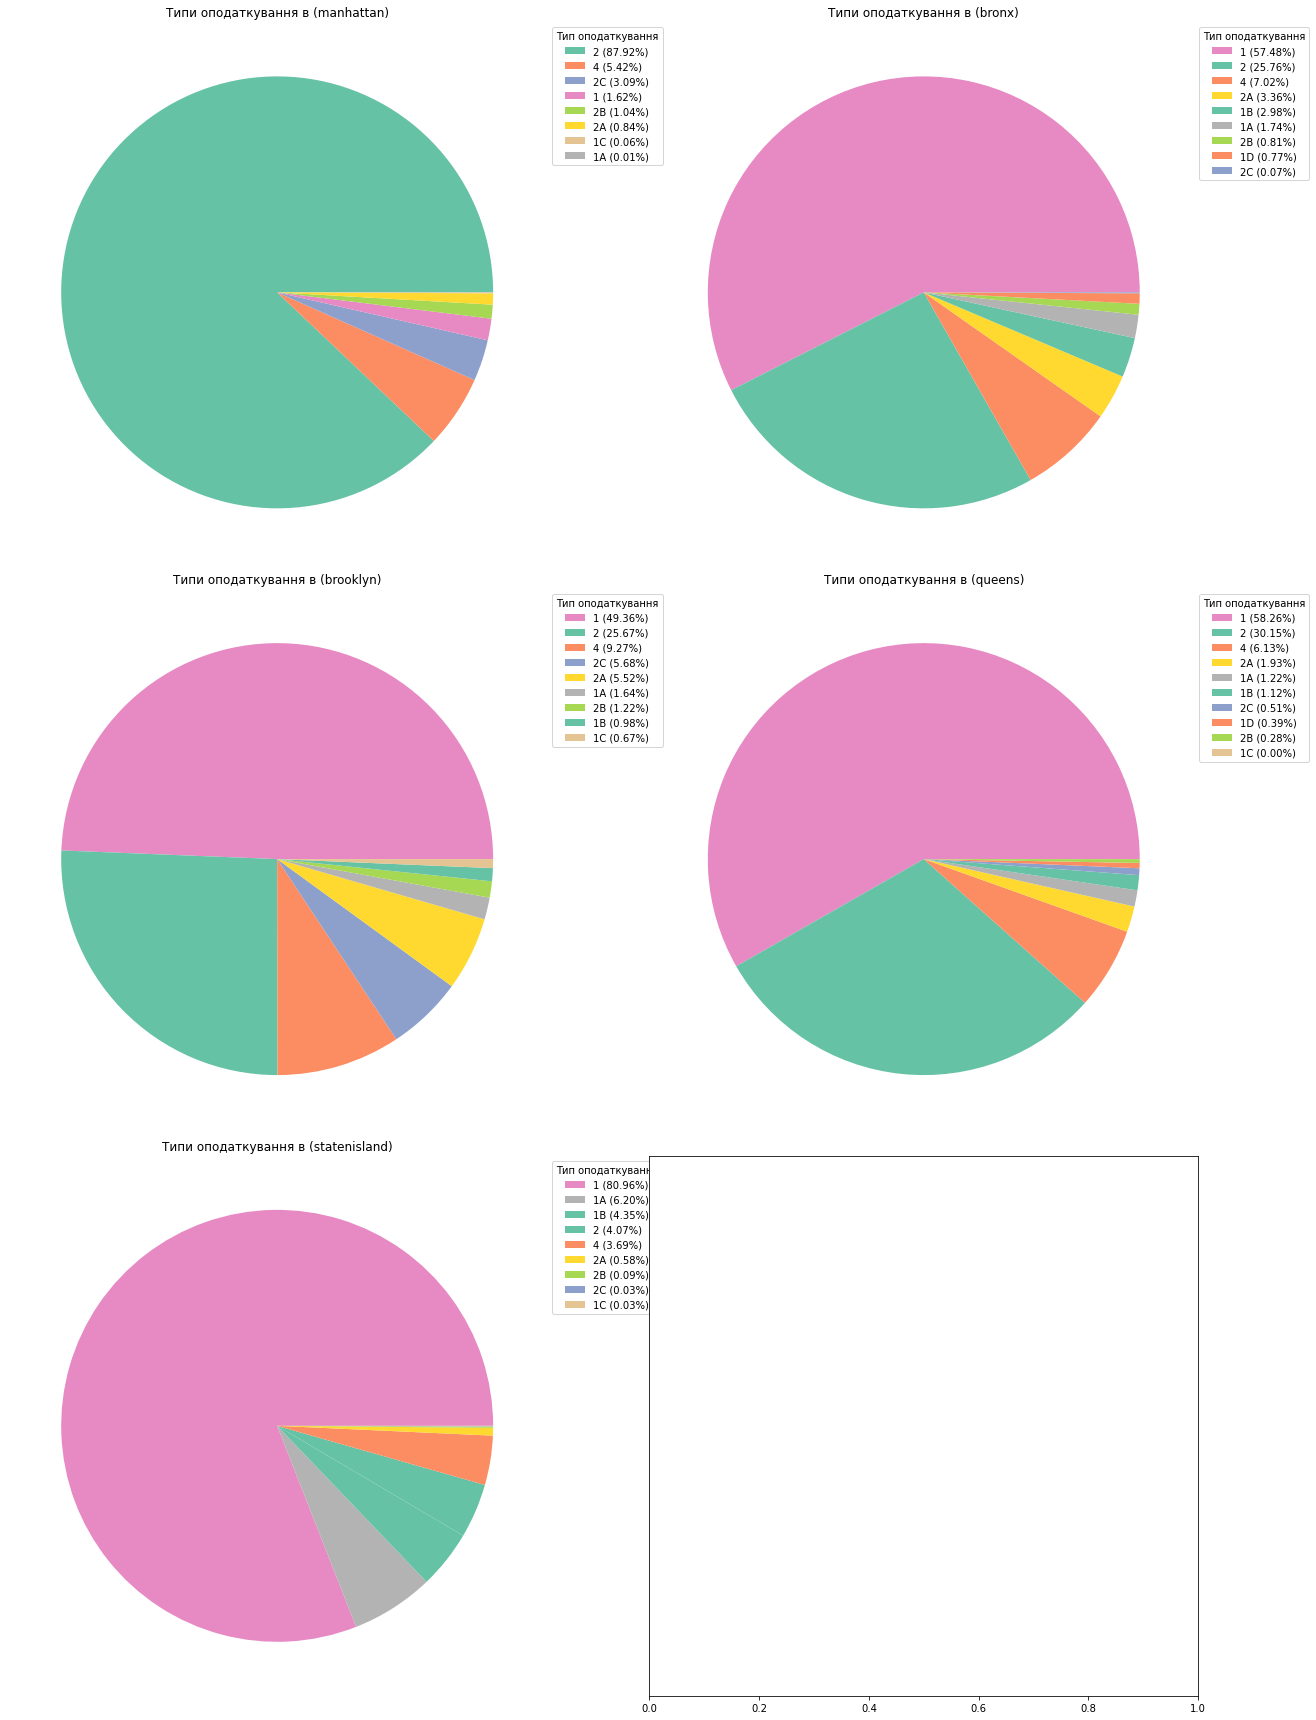

In [38]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 24), sharey=True)
tax_colors = {}
color_palette = sb.color_palette("Set2")
for i, df in enumerate(boroughs):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    df = df.copy()
    df = df[df['TAX CLASS AT PRESENT'] != '']
    tax_counts = df['TAX CLASS AT PRESENT'].dropna().value_counts()
    total_objects = len(df)

    tax_ratios = (tax_counts * 100 / total_objects).reset_index()
    tax_ratios.columns = ['TAX CLASS AT PRESENT', 'Частка']
    labels = [f"{label} ({percent:.2f}%)" for label, percent in zip(tax_ratios['TAX CLASS AT PRESENT'], tax_ratios['Частка'])]

    colors = [assign_color(tax_type) for tax_type in tax_ratios['TAX CLASS AT PRESENT']]

    ax.pie(tax_ratios['Частка'], colors=colors, textprops={'fontsize': 14})
    ax.legend(labels, title='Тип оподаткування', loc='upper left', bbox_to_anchor=(1, 1))
    ax.set_title(f'Типи оподаткування в ({borough_names[i]})')

plt.tight_layout()
plt.savefig(f'Типи_оподаткування_{borough}.png', dpi=300)
plt.show()

Кореляція між GROSS SQUARE FEET та SALE PRICE (Manhattan): 0.17024730736604857
Кореляція між GROSS SQUARE FEET та SALE PRICE (Bronx): 0.44811027419150684
Кореляція між GROSS SQUARE FEET та SALE PRICE (Brooklyn): 0.3714545411201427
Кореляція між GROSS SQUARE FEET та SALE PRICE (Queens): 0.511009300439505
Кореляція між GROSS SQUARE FEET та SALE PRICE (Statenisland): 0.5830830017675076


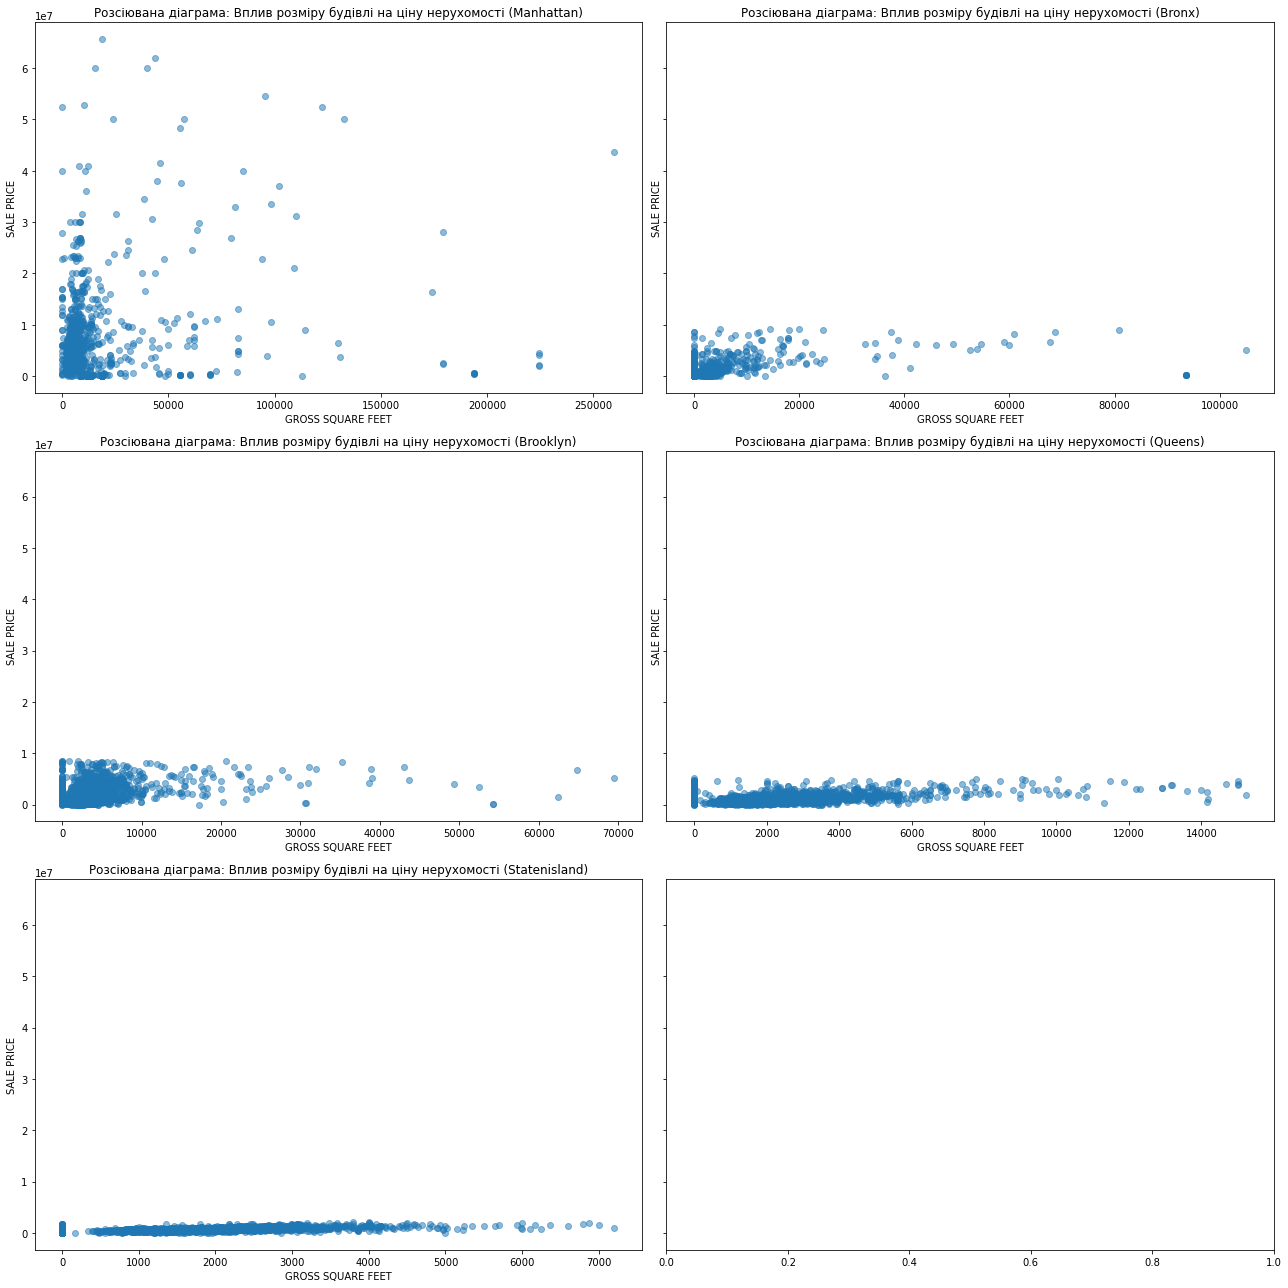

In [39]:
num_rows = 3
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 6 * num_rows), sharey=True)

for i, df in enumerate(boroughs):
    df = df.copy()
    df = df[df['GROSS SQUARE FEET'] != '']
    df.loc[:, 'GROSS SQUARE FEET'] = pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')
    df = df.dropna(subset=['GROSS SQUARE FEET', 'SALE PRICE'])
    
    std_dev_land = np.std(df['GROSS SQUARE FEET'])
    std_dev_price = np.std(df['SALE PRICE'])

    # Визначення межі для "відсічки" (наприклад, 3 стандартних відхилень від середнього)
    trim_threshold_land = 2 * std_dev_land
    trim_threshold_price = 2 * std_dev_price
    min_price_threshold = 7000
    # Фільтрація даних, залишаючи лише значення в межах "відсічки"
    df = df[(df['GROSS SQUARE FEET'] <= trim_threshold_land) & (df['GROSS SQUARE FEET'] >= 0)]
    df = df[(df['SALE PRICE'] <= trim_threshold_price) & (df['SALE PRICE'] >= min_price_threshold)]
    
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    ax.scatter(df['GROSS SQUARE FEET'], df['SALE PRICE'], alpha=0.5)
    ax.set_title(f'Розсіювана діаграма: Вплив розміру будівлі на ціну нерухомості ({borough_names[i].capitalize()})')
    ax.set_xlabel('GROSS SQUARE FEET')
    ax.set_ylabel('SALE PRICE')

    correlation = df['GROSS SQUARE FEET'].corr(df['SALE PRICE'])
    print(f'Кореляція між GROSS SQUARE FEET та SALE PRICE ({borough_names[i].capitalize()}): {correlation}')

plt.tight_layout()
plt.savefig(f'Вплив_розміру_будівлі_на_ціну_{borough}.png', dpi=300)
plt.show()